# Shopify Data Science Intern Challenge - Bijan Borzou

# Question 1
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

# Part a)

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data

## Solution:

Reading the data as a Panda dataframe

In [3]:
import numpy as np 
import pandas as pd 
import os

df = pd.read_csv("./2019 Winter Data Science Intern Challenge Data Set.csv")


Extracting the stochastic information of the dataset

In [4]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

# Outliers and Skewed Data

It can be seen the AOV obtained to be roughly 3145, is the mean of the dataset. 
However, looking at other statistical parameters, it can be seen that the standard deviation is also very high (41282), suggesting the reason for the high mean. In other words, the variation of values from the mean is as high as 41282 which implies that mean is not a good metric for this case.
To explore in more details, the possibility of existence of outliers skewing the data could be the reason why the given AOV (the mean) is far from the actual AOV. To verify that, we could count the high order amounts (grouping the data by order amounts) and the skewness of the dataset.

In [5]:
unique_amounts = df.groupby(['order_amount']).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
unique_amounts.head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


It can be seen that high order amounts have also been repeated in some cases.  

For example, we can extract and locate one of these high values from the actual dataset to see if there is any pattern related to it.

In [6]:
df.loc[df['order_amount'].isin([704000])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00


It seems that this high amount order (704000) is related to a business purchase with high number of total items (2000) from one specific shop id (42). These sort of items could make the data skewed to one side. 

# Better Way of Evaluation:
A better way of evaluating this data, would be getting rid of outlier values and only focusing on those values that are more concenterated around the mean. For instance, the 1.25 times the interquartile range could be considered around the mean.

<AxesSubplot:>

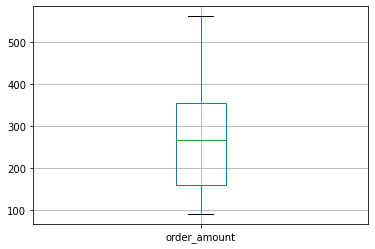

In [13]:
q1 = df.order_amount.quantile(q=0.25)
q2 = df.order_amount.quantile(q=0.5)
q3 = df.order_amount.quantile(q=0.75)

df_new = df[(df.order_amount < q2 + (q3 - q1) * 1.25) & (df.order_amount > q2 - (q3 - q1) * 1.25)]
df_new.boxplot(column='order_amount')

In [14]:
df_new.order_amount.describe()

count    4616.000000
mean      275.673744
std       123.772402
min        90.000000
25%       160.000000
50%       266.000000
75%       354.000000
max       561.000000
Name: order_amount, dtype: float64

It can be seen that the mean is now roughly 275 which makes more sense that previously calculated 3145.

# Part b)
What metric would you report for this dataset?

## Solution:


Looking at the statistical metrics above, the median value could be taken as an appropriate metric for this application.

# Part c)
What is its value?


## Solution:

As obtained above, the value is 266

# Question 2
For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.




# Part a)
How many orders were shipped by Speedy Express in total?

# Solution:

To find the number of orders shipped by Shippy Express, we need to join the Orders and Shippers Tables using the following SQL code:

---------------------------------------------------------------------------------


SELECT COUNT(*) AS OrderCounts

FROM [Orders]

JOIN [Shippers]

    ON [Shippers].ShipperID = [Orders].ShipperID
    
WHERE [Shippers].ShipperName = 'Speedy Express'

---------------------------------------------------------------------------------

By running the above code, it can be seen that the number of orders shipped by Shippy Express is 54.

# Part b)
What is the last name of the employee with the most orders?


# Solution:

This time, we need to join the Orders and Employees tables and group the result by Employees Last Names in order to count the number of orders performed by each employee. The following SQL code performs the operation:

---------------------------------------------------------------------------------------------------


SELECT [Employees].LastName, [Employees].FirstName, COUNT(*) AS OrdersCount

FROM [Orders]

JOIN [Employees]

ON [Orders].EmployeeID = [Employees].EmployeeID

GROUP BY [Employees].LastName

ORDER BY OrdersCount DESC

---------------------------------------------------------------------------------------------------

It can be seen as the output of the above code, employee Margaret Peacock with 40 orders has the most orders.

# Part c)
What product was ordered the most by customers in Germany?


# Solution:

Again here we need to join the a column for sum of the orders from the product tables with customer ID from customer table to find the answer.

-----------------------------------------------------------------------------

SELECT [Products].ProductName,

    SUM([OrderDetails].Quantity) AS "SumofOrders"
    
FROM [Orders]

JOIN [Customers]

    ON [Customers].CustomerID = [Orders].CustomerID
    
JOIN [OrderDetails]

    ON [OrderDetails].OrderID = [Orders].OrderID
    
JOIN [Products]

    ON [Products].ProductID = [OrderDetails].ProductID
    
WHERE [Customers].Country = 'Germany'

GROUP BY [OrderDetails].ProductID

ORDER BY SumofOrders DESC

---------------------------------------------------------------------------------

The answer is found to be the Boston Crab Meat with 160 orders.